# List 1 Computational Physics

First we will import the necessary libraries for this lesson

In [57]:
import numpy as np
from cmath import exp, pi
import matplotlib.pyplot as plt
from pylab import *

## Problem 1 - Calculate the Discret Fourier Transform DFT

In [733]:
def dft(y):
    N = len(y)
    c = zeros(N, complex)
    for k in range(N):
        for n in range(0, N-1):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

### **Alternative a)** First we will calculate our first function

In [735]:
def square(point, L):
    if (point <= L/2):
        return 2
    else:
        return -2

In [678]:
a = 0
L = 10
N = 1000
h = (L-a)/N

tpoints = arange(a, L, h)
y = []

for k in tpoints:
    y.append(square(k, L))

Our square function looks like this

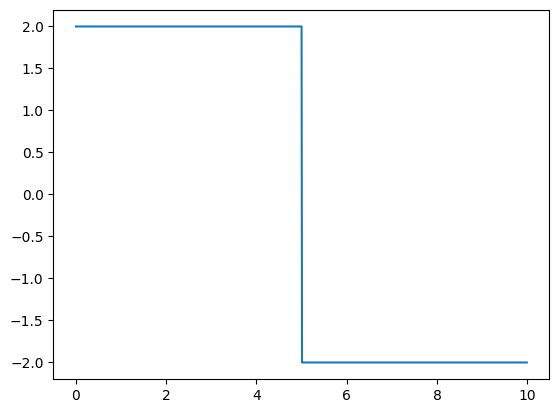

In [724]:
plt.plot(tpoints, y)
plt.show()

and its coefficient amplitudes

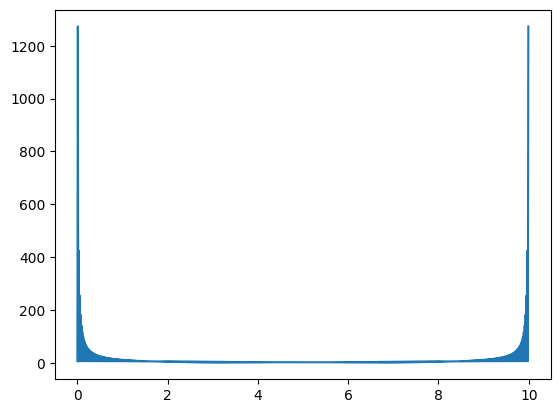

In [749]:
cka = dft(y)
plt.plot(tpoints, abs(cka))
plt.show()

### **Alternative b)** Now for the next function we have

In [704]:
def sinsin10(point, L, N):
    return sin(pi*point/N)*sin(10*pi*point/N)

In [720]:
a2, b2 = 0, 1000
N2 = 1000
h2 = (b2-a2)/N2

t2points = arange(a, b2, h2)
y2 = []

for k in t2points:
    y2.append(sinsin10(k, b2, N2))

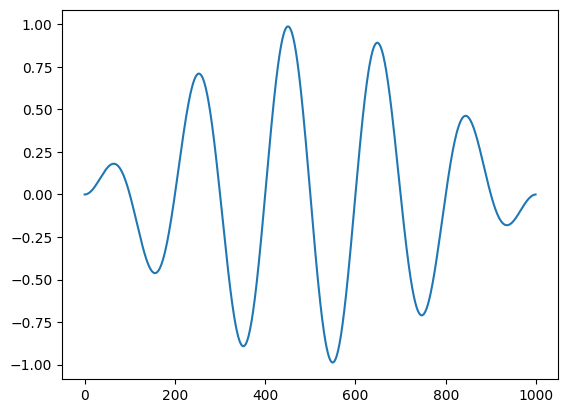

In [722]:
plt.plot(t2points, y2)
plt.show()

and its coefficient amplitudes

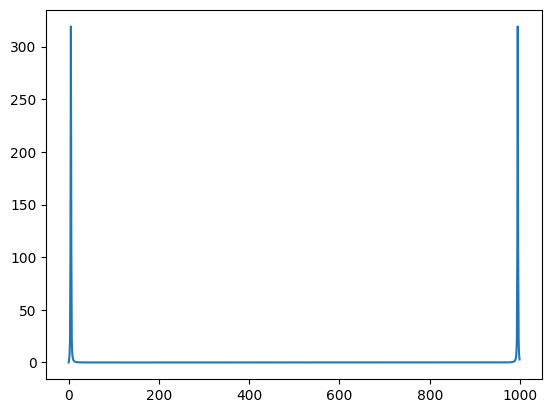

In [751]:
ckb = dft(y2)
plt.plot(t2points, abs(ckb))
plt.show()

## Problem 2 - Detecting the periodicity of a signal

### **Alternative a)** 